# Convolutional Neural Networks

* Convolutional layers are comprised of filters and feature maps.

## Filters

* The filters are essentially the neurons of the layer. They have both weighted inputs and generate an output value like a neuron. The input size is a fixed square called a patch or a receptive field. If the convolutional layer is an input layer, then the input patch will be pixel values. If they deeper in the network architecture, then the convolutional layer will take input from a feature map from the previous layer.

## Feature Maps

* The feature map is the output of one filter applied to the previous layer. A given filter is drawn across the entire previous layer, moved one pixel at a time. Each position results in an activation of the neuron and the output is collected in the feature map.

* The distance that filter is moved across the input from the previous layer each activation is referred to as the stride. If the size of the previous layer is not cleanly divisible by the size of the filters receptive field and the size of the stride then it is possible for the receptive field to attempt to read o↵ the edge of the input feature map. In this case, techniques like zero padding can be used to invent mock inputs with zero values for the receptive field to read.

## Pooling Layers

* The pooling layers down-sample the previous layers feature map. Pooling layers follow a sequence of one or more convolutional layers and are intended to consolidate the features learned and expressed in the previous layers feature map. As such, pooling may be consider a technique to compress or generalize feature representations and generally reduce the overfitting of the training data by the model.

## Fully Connected Layers

* Fully connected layers are the normal flat feedforward neural network layer. These layers may have a nonlinear activation function or a softmax activation in order to output probabilities of class predictions. Fully connected layers are used at the end of the network after feature extraction and consolidation has been performed by the convolutional and pooling layers. They are used to create final nonlinear combinations of features and for making predictions by the network.

## Image Input Data

* Let’s assume we have a dataset of gray scale images. Each image has the same size of 32 pixels wide and 32 pixels high, and pixel values are between 0 and 255, e.g. a matrix of 32 ⇥ 32 ⇥ 1 or 1,024 pixel values. Image input data is expressed as a 3-dimensional matrix of width ⇥ height ⇥ channels. If we were using color images in our example, we would have 3 channels for the red, green and blue pixel values, e.g. 32 ⇥ 32 ⇥ 3.

## Convolutional Layer

* We define a convolutional layer with 10 filters and a receptive field 5 pixels wide and 5 pixels high and a stride length of 1. Because each filter can only get input from (i.e. see) 5 ⇥ 5 (25) pixels at a time, we can calculate that each will require 25 + 1 input weights (plus 1 for the bias input).

## Pool Layer
* We define a pooling layer with a receptive field with a width of 2 inputs and a height of 2 inputs. We also use a stride of 2 to ensure that there is no overlap. This results in feature maps that are one half the size of the input feature maps. From 10 di↵erent 28 ⇥ 28 feature maps as input to 10 di↵erent 14 ⇥ 14 feature maps as output. 

## Fully Connected Layer
* Finally, we can flatten out the square feature maps into a traditional flat fully connected layer. We can define the fully connected layer with 200 hidden neurons, each with 10 ⇥ 14 ⇥ 14 input connections, or 1,960 + 1 weights per neuron. That is a total of 392,200 connections and weights to learn in this layer. We can use a sigmoid or softmax transfer function to output probabilities of class values directly.

## Input Receptive Field Dimensions: 
* The default is 2D for images, but could be 1D such as for words in a sentence or 3D for video that adds a time dimension.

## Receptive Field Size: 
* The patch should be as small as possible, but large enough to see features in the input data. It is common to use 3 ⇥ 3 on small images and 5 ⇥ 5 or 7 ⇥ 7 and more on larger image sizes.

## Stride Width:
*  Use the default stride of 1. It is easy to understand and you don’t need padding to handle the receptive field falling o↵ the edge of your images. This could be increased to 2 or larger for larger images.

## Number of Filters:
* Filters are the feature detectors. Generally fewer filters are used at the input layer and increasingly more filters used at deeper layers.

## Padding:
* Set to zero and called zero padding when reading non-input data. This is useful when you cannot or do not want to standardize input image sizes or when you want to use receptive field and stride sizes that do not neatly divide up the input image size.

## Pooling: 
* Pooling is a destructive or generalization process to reduce overfitting. Receptive field size is almost always set to 2 ⇥ 2 with a stride of 2 to discard 75% of the activations from the output of the previous layer.

## Data Preparation: 
* Consider standardizing input data, both the dimensions of the images and pixel values.

## Pattern Architecture: 
* It is common to pattern the layers in your network architecture. This might be one, two or some number of convolutional layers followed by a pooling layer. This structure can then be repeated one or more times. Finally, fully connected layers are often only used at the output end and may be stacked one, two or more deep.


## Dropout: 
* CNNs have a habit of overfitting, even with pooling layers. Dropout should be used such as between fully connected layers and perhaps after pooling layers.

## Handwritten Digit Recognition

In [21]:
# Baseline MLP for MNIST dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
  # create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, activation= 'relu' ))
  model.add(Dense(num_classes, activation= 'softmax' ))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
  return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
    verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10


2024-04-08 18:09:17.386918: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


300/300 - 1s - loss: 0.2771 - accuracy: 0.9215 - val_loss: 0.1412 - val_accuracy: 0.9575 - 1s/epoch - 5ms/step
Epoch 2/10
300/300 - 2s - loss: 0.1096 - accuracy: 0.9685 - val_loss: 0.0948 - val_accuracy: 0.9715 - 2s/epoch - 6ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0715 - accuracy: 0.9785 - val_loss: 0.0774 - val_accuracy: 0.9759 - 2s/epoch - 5ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0502 - accuracy: 0.9851 - val_loss: 0.0719 - val_accuracy: 0.9766 - 1s/epoch - 5ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0365 - accuracy: 0.9895 - val_loss: 0.0650 - val_accuracy: 0.9797 - 1s/epoch - 5ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0265 - accuracy: 0.9931 - val_loss: 0.0673 - val_accuracy: 0.9795 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0206 - accuracy: 0.9946 - val_loss: 0.0651 - val_accuracy: 0.9801 - 1s/epoch - 5ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0167 - accuracy: 0.9956 - val_loss: 0.0588 - val_accuracy: 0.9807 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 1s - loss: 0.0

## Simple Convolutional Neural Network for MNIST

In [30]:

# Simple CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_last')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
  # create model
  model = Sequential()
  model.add(Convolution2D(32, 5, 5, input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
    verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 1s - loss: 1.1179 - accuracy: 0.6468 - val_loss: 0.5615 - val_accuracy: 0.8387 - 1s/epoch - 5ms/step
Epoch 2/10
300/300 - 1s - loss: 0.6087 - accuracy: 0.8083 - val_loss: 0.4137 - val_accuracy: 0.8770 - 1s/epoch - 3ms/step
Epoch 3/10
300/300 - 1s - loss: 0.5170 - accuracy: 0.8372 - val_loss: 0.3597 - val_accuracy: 0.8932 - 823ms/epoch - 3ms/step
Epoch 4/10
300/300 - 1s - loss: 0.4678 - accuracy: 0.8504 - val_loss: 0.3246 - val_accuracy: 0.9014 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 1s - loss: 0.4345 - accuracy: 0.8622 - val_loss: 0.3030 - val_accuracy: 0.9089 - 866ms/epoch - 3ms/step
Epoch 6/10
300/300 - 1s - loss: 0.4070 - accuracy: 0.8718 - val_loss: 0.2861 - val_accuracy: 0.9136 - 915ms/epoch - 3ms/step
Epoch 7/10
300/300 - 1s - loss: 0.3896 - accuracy: 0.8762 - val_loss: 0.2778 - val_accuracy: 0.9162 - 857ms/epoch - 3ms/step
Epoch 8/10
300/300 - 1s - loss: 0.3711 - accuracy: 0.8822 - val_loss: 0.2594 - val_accuracy: 0.9213 - 969ms/epoch - 3ms/step
Epoch 9/1

## Larger CNN

In [36]:

# Simple CNN for the MNIST Dataset
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_last')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model
def baseline_model():
  # create model
  model = Sequential()
  model.add(Convolution2D(30,( 5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Convolution2D(15,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
    verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 8s - loss: 0.4186 - accuracy: 0.8647 - val_loss: 0.0841 - val_accuracy: 0.9752 - 8s/epoch - 28ms/step
Epoch 2/10
300/300 - 7s - loss: 0.1027 - accuracy: 0.9691 - val_loss: 0.0596 - val_accuracy: 0.9811 - 7s/epoch - 25ms/step
Epoch 3/10
300/300 - 7s - loss: 0.0731 - accuracy: 0.9773 - val_loss: 0.0537 - val_accuracy: 0.9830 - 7s/epoch - 24ms/step
Epoch 4/10
300/300 - 7s - loss: 0.0595 - accuracy: 0.9814 - val_loss: 0.0368 - val_accuracy: 0.9879 - 7s/epoch - 24ms/step
Epoch 5/10
300/300 - 8s - loss: 0.0510 - accuracy: 0.9842 - val_loss: 0.0355 - val_accuracy: 0.9885 - 8s/epoch - 26ms/step
Epoch 6/10
300/300 - 9s - loss: 0.0438 - accuracy: 0.9861 - val_loss: 0.0354 - val_accuracy: 0.9879 - 9s/epoch - 29ms/step
Epoch 7/10
300/300 - 9s - loss: 0.0392 - accuracy: 0.9879 - val_loss: 0.0306 - val_accuracy: 0.9899 - 9s/epoch - 31ms/step
Epoch 8/10
300/300 - 9s - loss: 0.0346 - accuracy: 0.9887 - val_loss: 0.0271 - val_accuracy: 0.9904 - 9s/epoch - 31ms/step
Epoch 9/10
300/3

## Data Augmentation

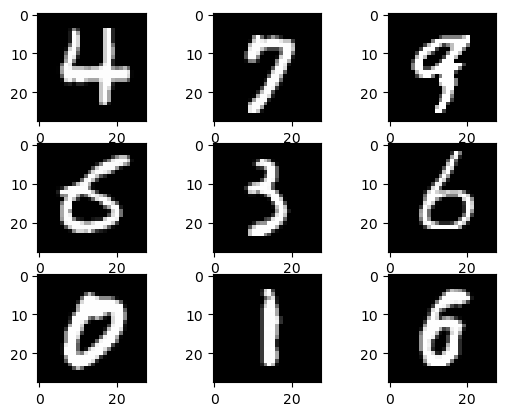

In [37]:
from keras.preprocessing.image import ImageDataGenerator
(X_train, y_train), (X_test, y_test) = mnist.load_data()
from matplotlib import pyplot
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  # create a grid of 3x3 images
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  # show the plot
  pyplot.show()
  break

## ZCA Whitening

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/keras/preprocessing/image.py:1285: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


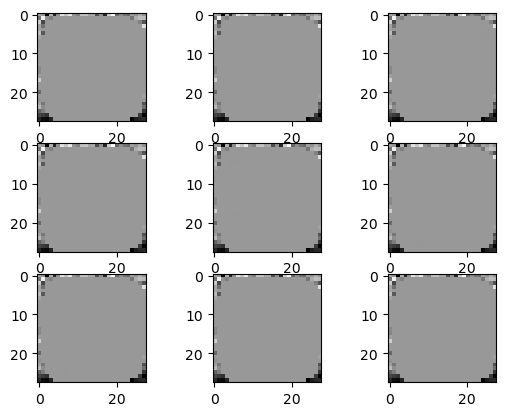

In [38]:
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  # create a grid of 3x3 images
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( 'gray' ))
  # show the plot
  pyplot.show()
  break

## Random Rotation

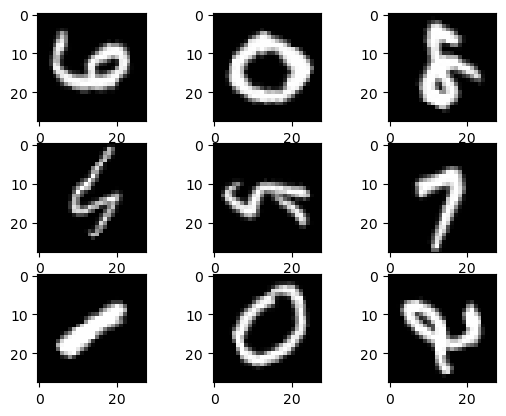

In [39]:
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  # create a grid of 3x3 images
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( 'gray' ))
  # show the plot
  pyplot.show()
  break

## Random Shifts

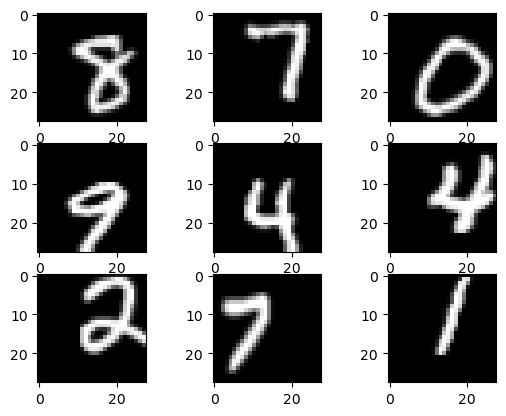

In [40]:
shift=0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  # create a grid of 3x3 images
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( 'gray' ))
  # show the plot
  pyplot.show()
  break

## Random Flips

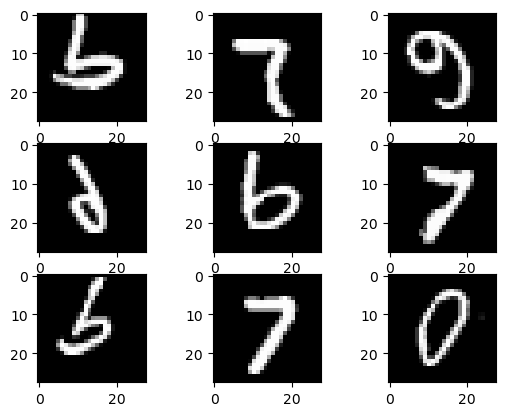

In [41]:
shift=0.2
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  # create a grid of 3x3 images
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( 'gray' ))
  # show the plot
  pyplot.show()
  break

## Project Object Recognition in Photographs

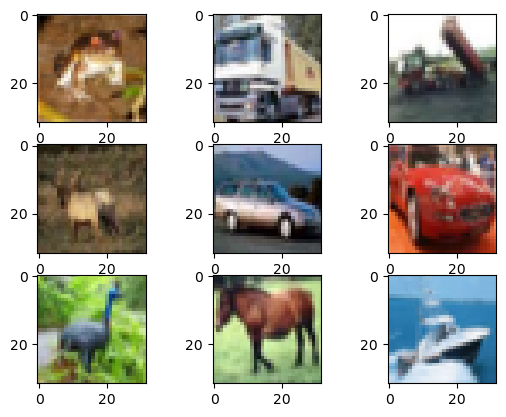

In [43]:
from keras.datasets import cifar10
from matplotlib import pyplot
from PIL import Image  # Import from Pillow instead of scipy.misc

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(Image.fromarray(X_train[i]))  # Use Image.fromarray here
pyplot.show()

## Advanced CNN

In [49]:
# Simple CNN model for the CIFAR-10 Dataset
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_last')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype( 'float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(32,32,3), padding= 'same' ,
    activation= 'relu' , kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation= 'relu' , padding= 'same' ,
    kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation= 'relu' , kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation= 'relu' ))
model.add(Dense(num_classes, activation= 'softmax' ))

# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss= 'categorical_crossentropy', optimizer=sgd, metrics=[ 'accuracy' ])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs,
    batch_size=32, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 11, 11, 32)        896       
                                                                 
 dropout_10 (Dropout)        (None, 11, 11, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 2, 2, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 512)               66048     
                                                     

In [52]:
# Simple CNN model for the CIFAR-10 Dataset
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_last')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype( 'float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Convolution2D(32, (3,3), input_shape=(32, 32, 3), activation= 'relu' ,
    padding= 'same' ))
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3,3), activation= 'relu',  padding= 'same' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, activation= 'relu' ,  padding= 'same' ))
model.add(Dropout(0.2))
model.add(Convolution2D(64, (3,3), activation= 'relu' ,  padding= 'same' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, (3,3), activation= 'relu' , padding= 'same'))
model.add(Dropout(0.2))
model.add(Convolution2D(128, (3,3), activation= 'relu' , padding= 'same' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation= 'relu' , kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation= 'relu' , kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation= 'softmax' ))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss= 'categorical_crossentropy', optimizer=sgd, metrics=[ 'accuracy' ])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs,
    batch_size=64, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_16 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 6, 6, 64)          18496     
                                                                 
 dropout_17 (Dropout)        (None, 6, 6, 64)          0         
                                                     

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


None
Epoch 1/25
